In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

Evaluate the performance of your model with the metrics you have learned in this course.
Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve


df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
pd.concat([df.isnull().sum(), 100*df.isnull().sum()/len(df)], axis=1).rename(columns ={0:'Number of Missing Records', 1:'Percentage(%)'}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Missing Records,0.0,0.0,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,0.0,687.000000,2.000000
Percentage(%),0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


In [4]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean())).astype('int64')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])
df.drop('PassengerId', axis=1, inplace=True) #since all unique and it does not affect survival rate 
df.drop('Cabin', axis=1, inplace=True) #almost all are empty and again no effect
df.drop('Name', axis=1, inplace=True)  #no effect so drop
df.drop('Embarked', axis=1, inplace=True)

In [5]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True).rename(columns={'male':'Sex'})
df['Fare'] = pd.get_dummies(df['Fare'], drop_first=True)
df['Ticket'] = pd.get_dummies(df['Ticket'], drop_first=True)
df['Fare'] = pd.get_dummies(df['Fare'], drop_first=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [7]:
Y = df['Survived']
X = df.drop('Survived', axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=111)


In [8]:
df_prediction_model = LogisticRegression()
df_prediction_model.fit(X_train, Y_train)

train_prediction = df_prediction_model.predict(X_train)
test_prediction = df_prediction_model.predict(X_test)

test_prediction_probability = df_prediction_model.predict_proba(X_test)[:,1]

Confusion Matrix

In [9]:
confusion_matrix_train = confusion_matrix(Y_train, train_prediction)
confusion_matrix_test = confusion_matrix(Y_test, test_prediction)
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[366  70]
 [ 75 201]]


Confusion Matrix (Test Data)
------------------------------
[[94 19]
 [21 45]]


In [10]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 94
True positive amount  : 45
False positive amount : 19
False negative amount : 21


In [11]:
print("ACCURACY")
print("--"*15)
print("Accuracy value by the model   : ",  df_prediction_model.score(X_test, Y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(Y_test, test_prediction))

ACCURACY
------------------------------
Accuracy value by the model   :  0.776536312849162
Calculated accuracy value     :  0.776536312849162
accuracy_score() value        :  0.776536312849162


In [12]:
print("ERROR RATE")
print("--"*15)
print("Error rate: ",  1-accuracy_score(Y_test, test_prediction))
print("Calculated error rate: ", (FN+FP)/(FN+FP+TN+TP))

ERROR RATE
------------------------------
Error rate:  0.22346368715083798
Calculated error rate:  0.22346368715083798


In [13]:
print("PRECISION")
print("--"*15)
print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(Y_test, test_prediction))

PRECISION
------------------------------
Calculated precision value   :  0.703125
precision_score() value      :  0.703125


In [14]:
print("RECALL/SENSITIVITY")
print("--"*15)
print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(Y_test, test_prediction))

RECALL/SENSITIVITY
------------------------------
Calculated recall value   :  0.6818181818181818
recall_score() value      :  0.6818181818181818


In [15]:
print("SPECIFY VALUE")
print("--"*15)
print("Calculated specificity value   : ",  (TN)/(TN + FP))

SPECIFY VALUE
------------------------------
Calculated specificity value   :  0.831858407079646


In [16]:
precision = precision_score(Y_test, test_prediction)
recall = recall_score(Y_test, test_prediction)

print("F1 SCORE")
print("--"*15)
print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(Y_test, test_prediction))

F1 SCORE
------------------------------
Calculated F1 score  :  0.6923076923076923
f1_score() value     :  0.6923076923076923


In [17]:
print("CLASSIFICATION REPORT")
print("--"*15)
print(classification_report(Y_test, test_prediction))

CLASSIFICATION REPORT
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.70      0.68      0.69        66

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



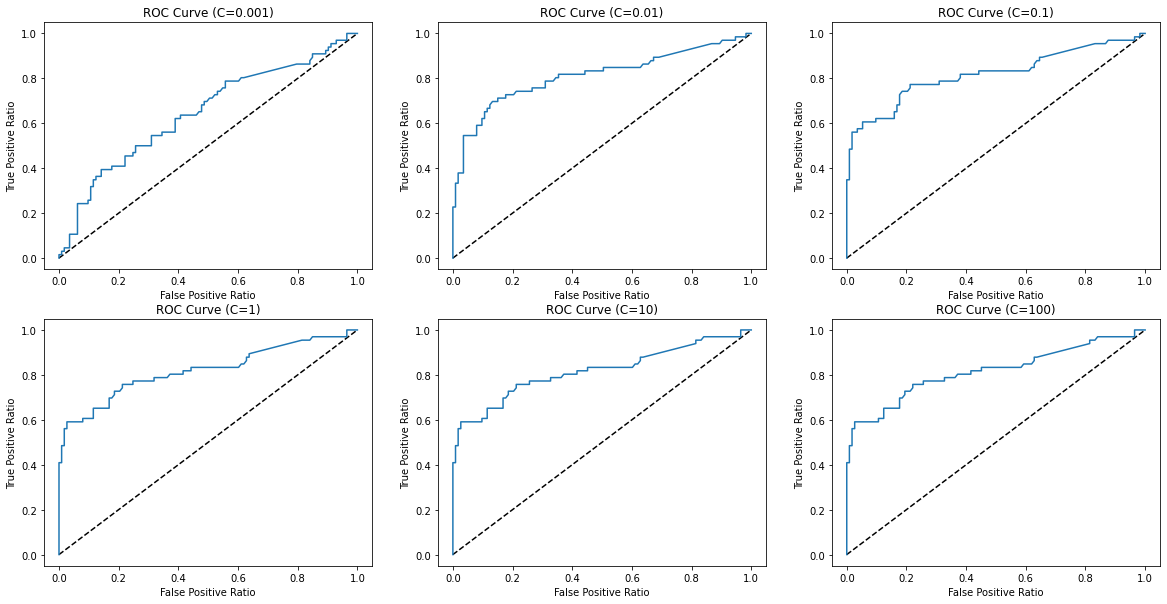

In [18]:
plt.figure(figsize=(20, 10))
for i in range(-3, 3, 1):
    plt.subplot(2, 3, i+4)
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, Y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, test_prediction_proba)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC Curve (C={})'.format(10**i))

plt.show()

In [19]:

for i in range(-4, 4, 1):
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, Y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    print('AUC value (C={}): {:.5f}'.format((10**i), roc_auc_score(Y_test, test_prediction_proba)))

AUC value (C=0.0001): 0.46460
AUC value (C=0.001): 0.64575
AUC value (C=0.01): 0.81081
AUC value (C=0.1): 0.81791
AUC value (C=1): 0.82019
AUC value (C=10): 0.81698
AUC value (C=100): 0.81577
AUC value (C=1000): 0.81242


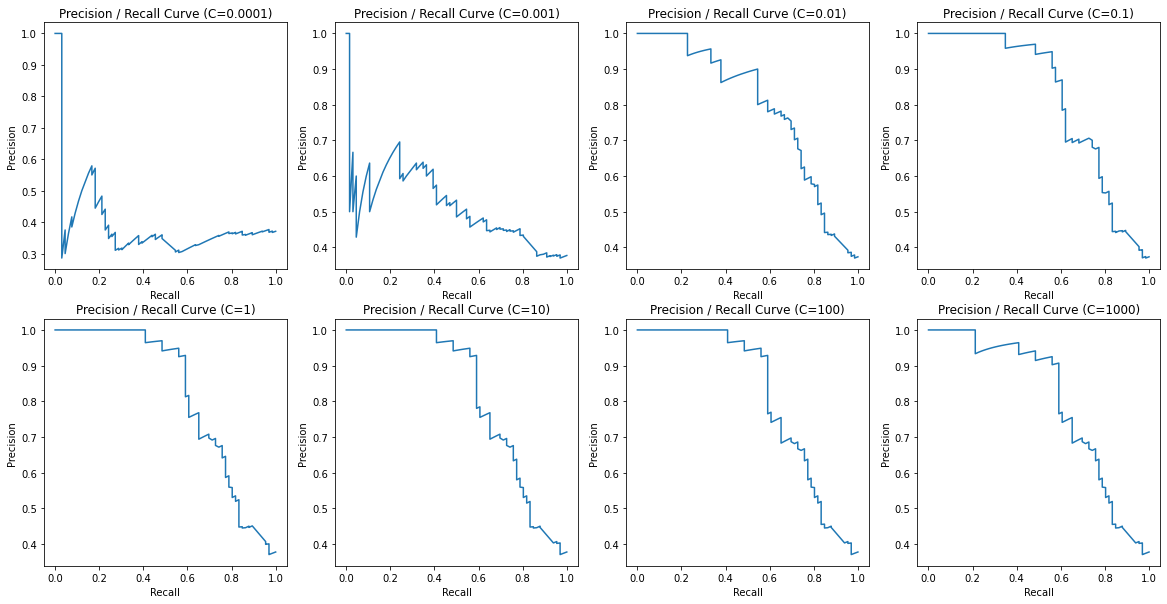

In [20]:

plt.figure(figsize=(20, 10))
for i in range(-4, 4, 1):
    plt.subplot(2, 4, i+5)
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, Y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(Y_test, test_prediction_proba)
    
    plt.plot(recall, precision)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision / Recall Curve (C={})'.format(10**i))


plt.show()